In [1]:
from M1M3tools import *
from datetime import datetime
from datetime import timedelta
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Circle

plt.style.use('classic')

%matplotlib inline

In [2]:
#What columns are in this table for campaign #2
table_name = 'm1m3_logevent_AppliedForces'
filename = 'efdData/AppliedForces_column_list2.txt'
if not os.path.isfile(filename):
    fid = open(filename, 'w')
    descr = pd.read_sql_query('describe {}'.format(table_name), engine2)
    for fieldName in descr['Field']:
        print(fieldName)
        fid.write('%s\n'%fieldName)
    fid.close()
else:
    print('-------Reading from %s-------------'%filename)
    fid = open(filename, 'r')
    for line in fid:
        print(line.strip())
    fid.close()     

-------Reading from efdData/AppliedForces_column_list2.txt-------------
date_time
private_revCode
private_sndStamp
private_rcvStamp
private_seqNum
private_origin
private_host
Timestamp
XForces_1
XForces_2
XForces_3
XForces_4
XForces_5
XForces_6
XForces_7
XForces_8
XForces_9
XForces_10
XForces_11
XForces_12
YForces
ZForces
Fx
Fy
Fz
Mx
My
Mz
ForceMagnitude
priority


### The following query the EFD to demonstrate that the string in column ZForces has been truncated

In [3]:
month = 2
day = 15
hour = 17
minute = 48
b0 = datetime(2019, month, day, hour, minute, 0)
b1 = b0 + timedelta(minutes = -2)
b2 = b0 + timedelta(minutes = 2)
#b1 = b0 + timedelta(minutes = 0)
#b2 = b0 + timedelta(days = 1)
table_name = 'm1m3_logevent_AppliedForces'
#table_name = 'MTM1M3TS_thermalData'
query = 'select * from {0} where {0}.date_time between \'{1}\' and \'{2}\';'.format(table_name, b1, b2)
print(query)
df1 = pd.read_sql_query(query, engine2)
for i in range(5):
    print(len( df1.ZForces[i].split()  )) # - timedelta(hours=7)
#print(df1.ZForces[0])

select * from m1m3_logevent_AppliedForces where m1m3_logevent_AppliedForces.date_time between '2019-02-15 17:46:00' and '2019-02-15 17:50:00';
146
146
146
146
146


### Prior to the last day, we had these optimized surfaces

In [4]:
f1 = get_F_EFD(1, 25, 17, 54) #33/28nm surfaces
#f1 = get_F_EFD_C1C2(1, 25, 17, 54) #33/28nm surfaces #same results as above

#f2 = get_F_EFD(2, 11, 17, 13) #35/26nm surfaces # EFD data lost

#f3 = get_F_EFD(2, 14, 23, 13) #30/26nm surfaces #AppliedForces truncated
f3 = get_F_EFD_C1C2(2, 14, 23, 13) #30/26nm surfaces

-------Reading from efdData/AppliedForces_190125_1754.csv-------------
-------Reading from efdData/AppliedCylinderForces_190214_2313.csv-------------


### Surfaces from the last day

In [5]:
fa = get_F_EFD_C1C2(2, 21, 16, 6) #28/24nm surfaces
fb = get_F_EFD_C1C2(2, 21, 17, 5) #31/20nm surfaces
fc = get_F_EFD_C1C2(2, 21, 17, 34) #27/21nm surfaces
fd = get_F_EFD_C1C2(2, 21, 22, 49) #28/20nm surfaces

-------Reading from efdData/AppliedCylinderForces_190221_1606.csv-------------
-------Reading from efdData/AppliedCylinderForces_190221_1705.csv-------------
-------Reading from efdData/AppliedCylinderForces_190221_1734.csv-------------
-------Reading from efdData/AppliedCylinderForces_190221_2249.csv-------------


### Look at the differences in forces: 
* f3 didn't have additional quad forces. f1 had those.
* f3 were with LSST bending modes

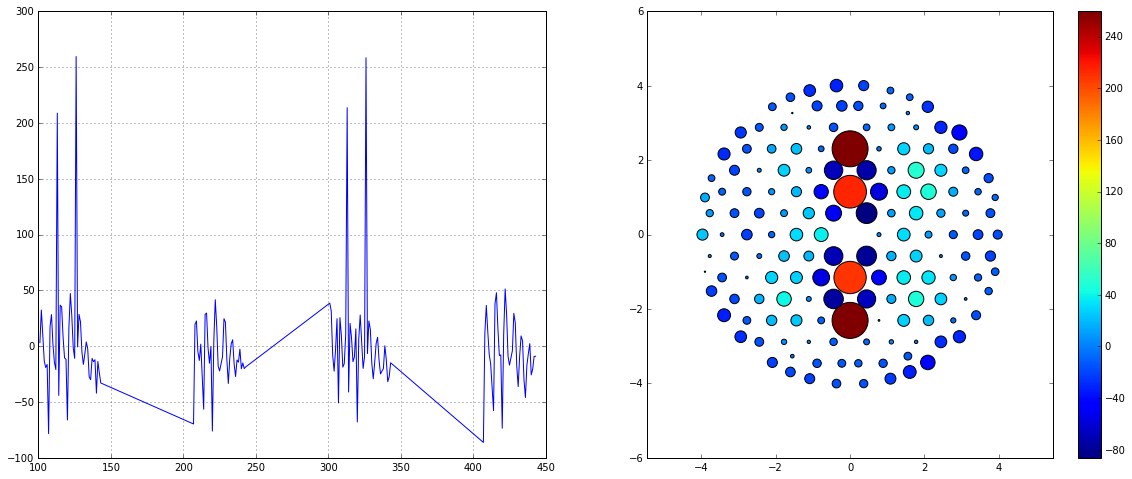

In [6]:
a=f1[:,3]-f3[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])

### We adjusted quads and those around it to further optimize the localized surface feature due to moments created by loadspreaders

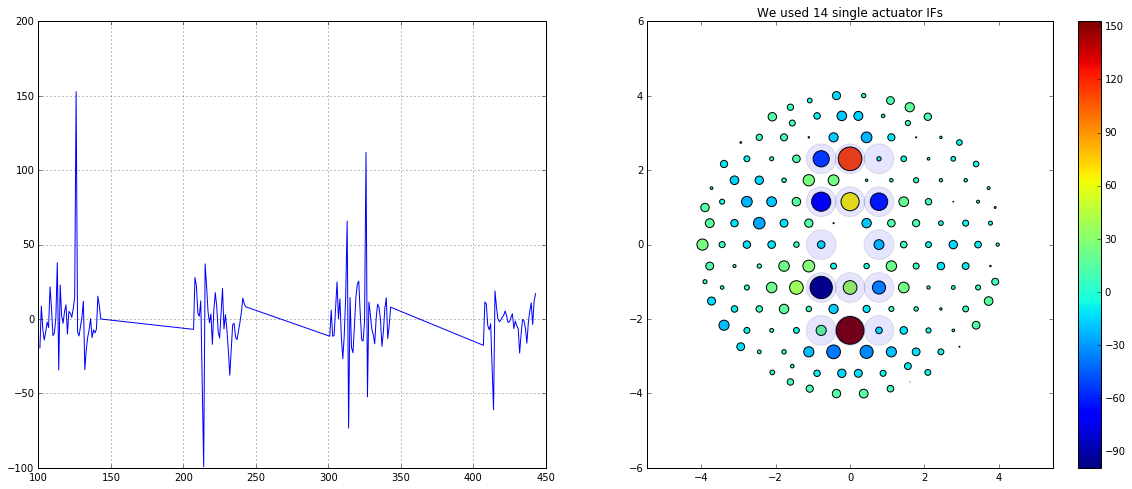

In [7]:
a=fa[:,3]-f3[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
quadID = [126, 113, 313, 326, 114, 214, 314, 414, 127, 227, 327, 427, 101, 301]
for i in range(len(quadID)):
    id = np.where(actID==quadID[i])[0][0]
    circ = Circle((xact[id], yact[id]),0.4, alpha=.1)
    ax[1].add_patch(circ)
aa = ax[1].set_title('We used %d single actuator IFs'%(len(quadID)))

#### One more iteration: further adjustments using 14 single actuator influence functions

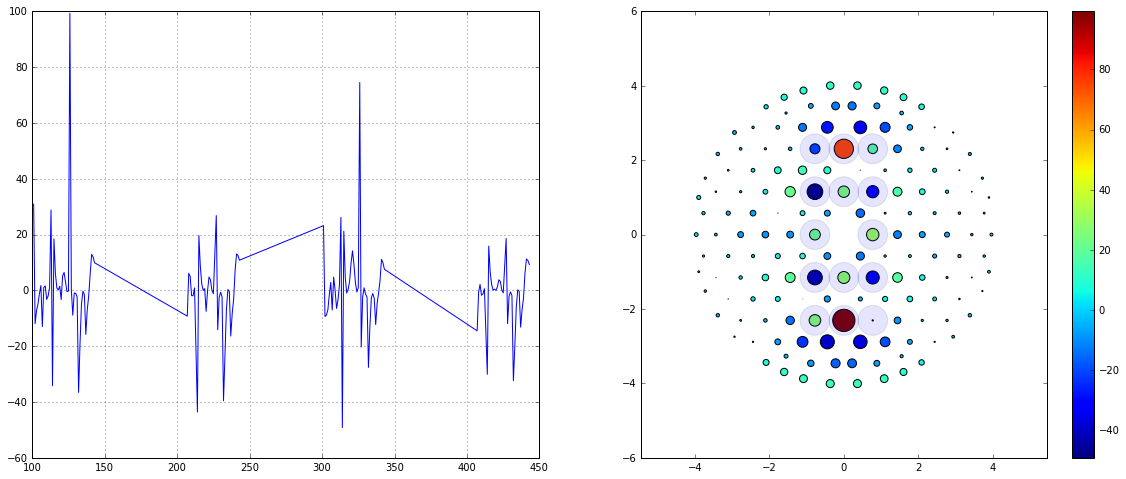

In [8]:
a=fb[:,3]-fa[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
quadID = [126, 113, 313, 326, 114, 214, 314, 414, 127, 227, 327, 427, 101, 301]
for i in range(len(quadID)):
    id = np.where(actID==quadID[i])[0][0]
    circ = Circle((xact[id], yact[id]),0.4, alpha=.1)
    ax[1].add_patch(circ)

#### One more iteration: but nothing is changing

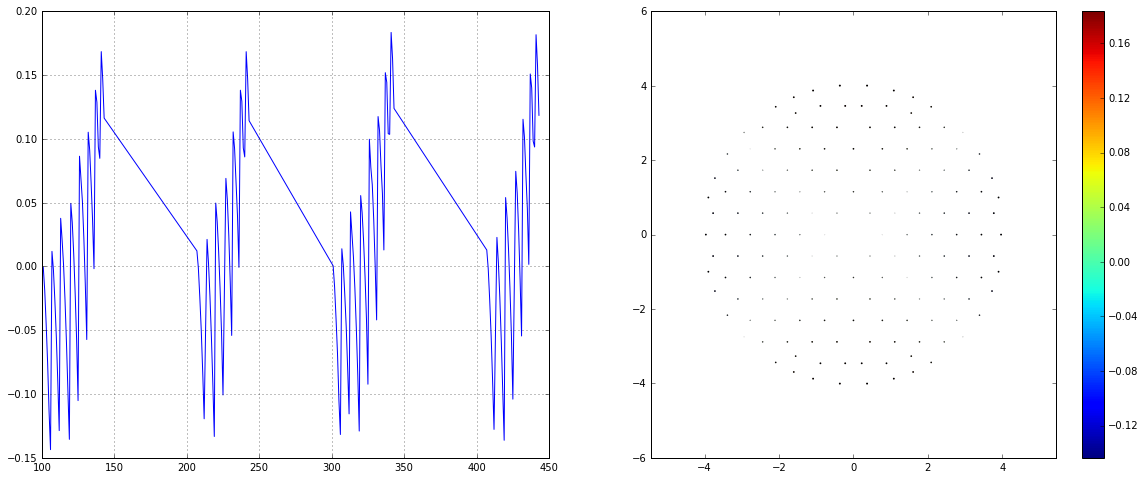

In [9]:
a=fc[:,3]-fb[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])

#### By the end of the day, things had drifted a bit, so additional low order bending modes had to be added to retrieve that optimized surface

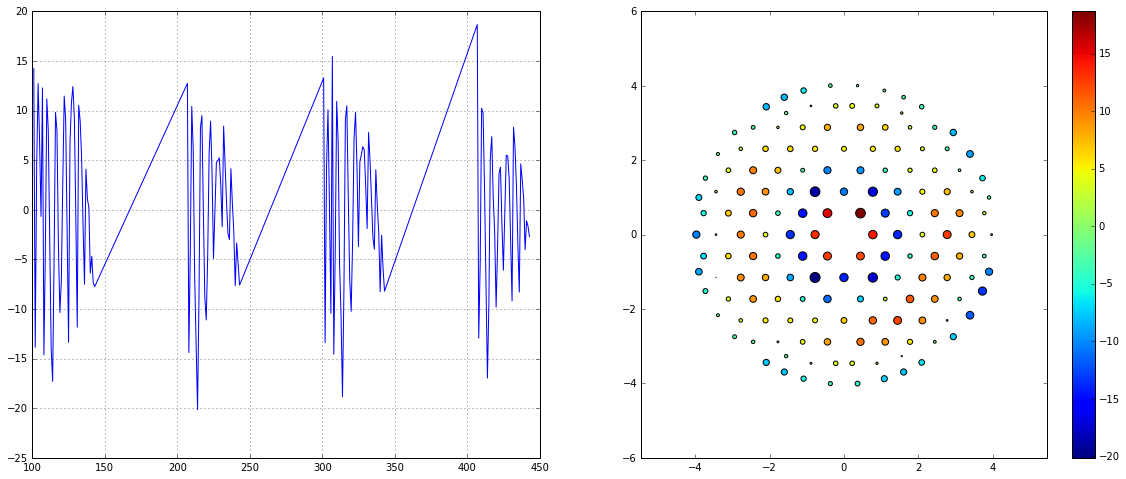

In [10]:
a=fd[:,3]-fc[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])

#### but fa is not good to be included in the average for LUT, because

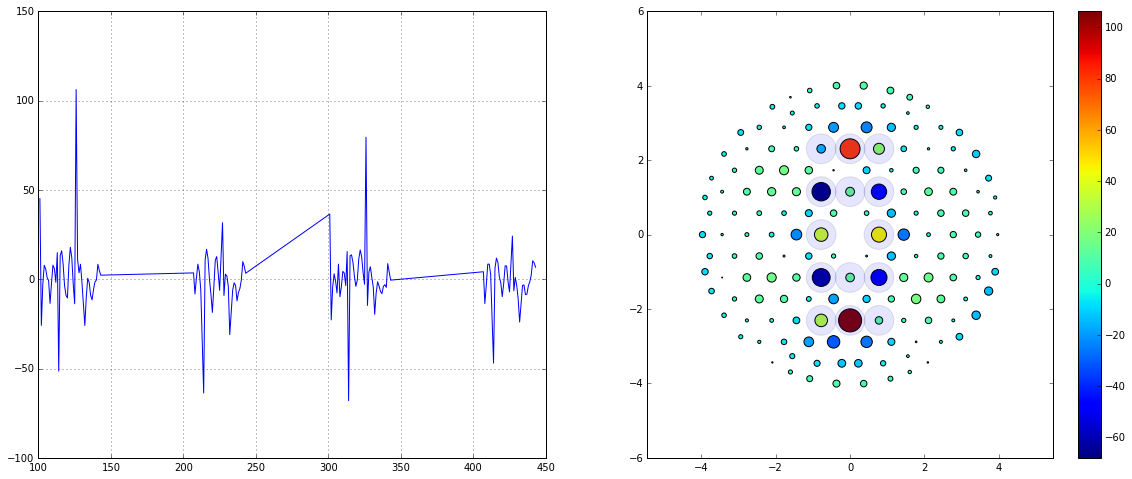

In [11]:
a=fd[:,3]-fa[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
for i in range(len(quadID)):
    id = np.where(actID==quadID[i])[0][0]
    circ = Circle((xact[id], yact[id]),0.4, alpha=.1)
    ax[1].add_patch(circ)

### We will use fb, fc, fd in the average for LUT forces
* f1 had additional quad forces
* f3 was before the quad adjustment, which helps compensate localized surface features caused by local moments created by loadspreaders
* fa is systematically different from fb, fc, fd. So the optimization wasn't there yet, although the surface quality was getting close.
* fb = fc
* fd is different from fb and fc by a lower order bending. Adding fd will help beat down noise. 1/3 of the lower oder bending will also get into the average, but it will be easy to be taken out by the AOS.

### What about x and y forces?

In [ ]:
#get one set of balance forces to look at
f3b = get_F_EFD(2, 14, 23, 13, table_name= 'm1m3_logevent_AppliedBalanceForces')

Text(0.5, 1.0, 'x forces on 190221')

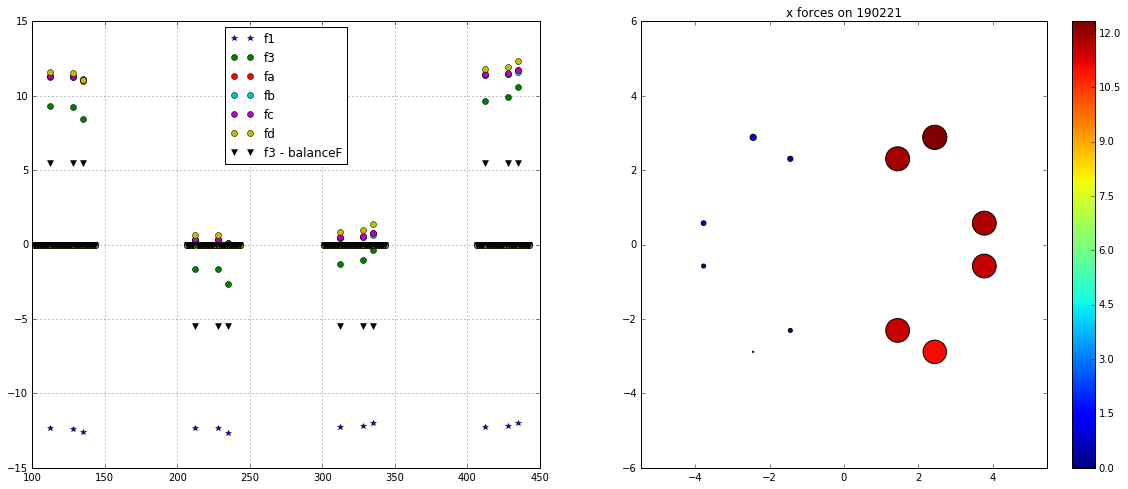

In [66]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],f1[:,1], '*', label='f1')
ax[0].plot(f1[:,0],f3[:,1], 'o', label='f3')
ax[0].plot(f1[:,0],fa[:,1], 'o', label='fa')
ax[0].plot(f1[:,0],fb[:,1], 'o', label='fb')
ax[0].plot(f1[:,0],fc[:,1], 'o', label='fc')
ax[0].plot(f1[:,0],fd[:,1], 'o', label='fd')
ax[0].plot(f1[:,0],f3[:,1]-f3b[:,1], 'v', label='f3 - balanceF')
ax[0].grid()
ax[0].legend(loc='best')
img = ax[1].scatter(xact, yact, abs(fa[:,1])*50, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('x forces on 190221 (fa)')

#### Explanation of what we see above, 
* there was an external net x force, probably from imperfect centering. 
    * for f1, the net x force was negative
    * for other force sets, the net x force was positive
* for f1, all x forces were equal magnitude, because we started from all zeros, then net Fx distribution is flat.
* for other forces, we started from 5.48N for the 100s and 400s actuators, and -5.48N for the 200s and 300s actuators. (see black triangles). The FB system added equal positve forces to all 12 x actuators, so everything shifted up a bit.

In [67]:
# we could check other force components quickly using examples below.
#f3s = get_F_EFD(2, 14, 23, 13, table_name= 'm1m3_logevent_AppliedStaticForces')
##f3a = get_F_EFD(2, 14, 23, 13, table_name= 'm1m3_logevent_AppliedActiveOpticForces') #no XForces or YForces
#f3s = get_F_EFD(2, 14, 23, 13, table_name= 'm1m3_logevent_AppliedStaticForces')

Text(0.5, 1.0, 'x forces on 190221')

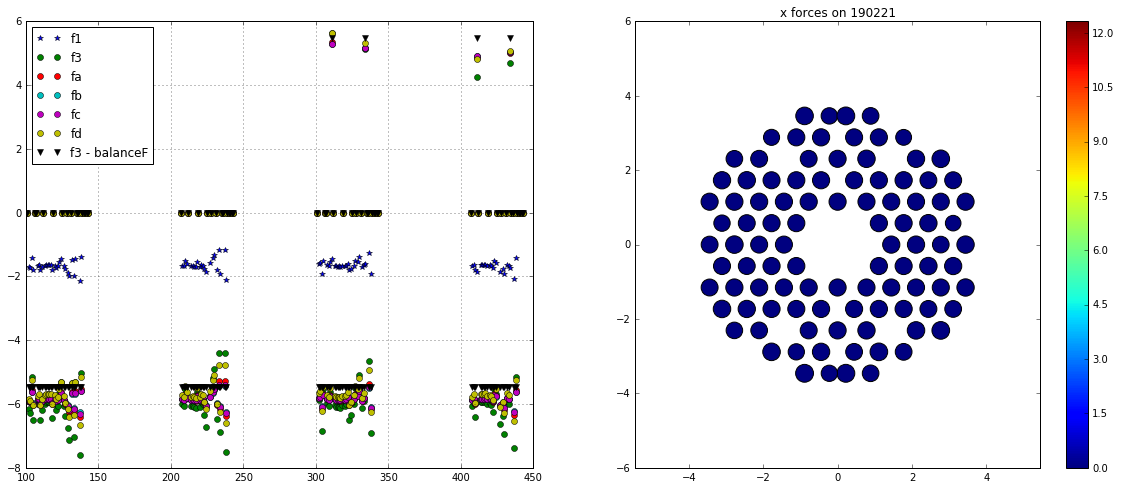

In [68]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],f1[:,2], '*', label='f1')
ax[0].plot(f1[:,0],f3[:,2], 'o', label='f3')
ax[0].plot(f1[:,0],fa[:,2], 'o', label='fa')
ax[0].plot(f1[:,0],fb[:,2], 'o', label='fb')
ax[0].plot(f1[:,0],fc[:,2], 'o', label='fc')
ax[0].plot(f1[:,0],fd[:,2], 'o', label='fd')
ax[0].plot(f1[:,0],f3[:,2]-f3b[:,2], 'v', label='f3 - balanceF')
ax[0].grid()
ax[0].legend(loc='best')
img = ax[1].scatter(xact, yact, abs(fa[:,2])*50, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('x forces on 190221 (fa)')

#### Explanation of what we see above, 
* there was an external net y force, probably from imperfect centering or actuator weight. 
    * for f1, the net y force was negative
    * for other force sets, the net y force was only due to actuator weight, because they do not deviate much from the initial +/-5.48N, as calculated.
* for f1, all y forces were equal magnitude, because we started from all zeros, then net Fy distribution is flat.
* for other forces, we started from -5.48N for most actuators, except +5.48N for the 4 actuators with reversed orientation. (see black triangles). The FB system only added some noise on the +/-5.48N.

In [71]:
fLUT = (fb+fc+fd)/3
pd.DataFrame(fLUT).to_csv("data/finalLUT.csv", header=None, index=None)